In [323]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv("space_mission_dataset_processed.csv", parse_dates=['Launch Time'])

In [97]:
df.tail(100)

Name           Mission Components   Mission Status  \
6874              Molniya                     Venera 1          Success   
6875              Molniya           1VA n°1 (Venera 1)          Failure   
6876    Atlas-LV3 Agena-A                      Samos 2          Success   
6877     Mercury-Redstone    Mercury-Redstone 2 (MR-2)          Success   
6878               Vostok    1K n°5 (Korabl-Sputnik 3)          Failure   
6879   Thor DM-21 Agena-B         RM 1 (Discoverer 19)          Success   
6880     Mercury-Redstone  Mercury-Redstone 1A (MR-1A)          Success   
6881         Atlas-D Able                 Pioneer P-31          Failure   
6882   Thor DM-21 Agena-B       KH-2 3 (Discoverer 18)          Success   
6883            Scout X-1              Explorer (S-56)          Failure   
6884               Vostok             Korabl-Sputnik 3          Success   
6885  Thor DM-21 Ablestar          Transit 3A & GRAB-2          Failure   
6886     Thor DM-19 Delta                      TIROS-2          Success   
6887     Mercury-Redstone    Mercury-Redstone 1 (MR-1)          Failure   
6888   Thor DM-21 Agena-B       KH-2 2 (Discoverer 17)          Success   
6889              Juno II                   Explorer 8          Success   
6890   Thor DM-21 Agena-B       KH-2 1 (Discoverer 16)          Failure   
6891              Molniya           1M n°2 (Marsnik 2)          Failure   
6892    Atlas-LV3 Agena-A                      Samos 1          Failure   
6893              Molniya           1M n°1 (Marsnik 1)          Failure   
6894  Thor DM-21 Ablestar                   Courier 1B          Success   
6895         Atlas-D Able                 Pioneer P-30          Failure   
6896   Thor DM-18 Agena-A      KH-1 10 (Discoverer 15)          Success   
6897               Vostok             Korabl-Sputnik 2          Success   
6898  Thor DM-21 Ablestar                   Courier 1A          Failure   
6899   Thor DM-18 Agena-A       KH-1 9 (Discoverer 14)          Success   
6900     Thor DM-19 Delta                      Echo 1A          Success   
6901   Thor DM-18 Agena-A                Discoverer 13          Success   
6902      Atlas-D Mercury       Mercury-Atlas 1 (MA-1)          Failure   
6903               Vostok    1K n°2 (Korabl-Sputnik 2)          Failure   
6904   Thor DM-18 Agena-A                Discoverer 12          Failure   
6905  Thor DM-21 Ablestar          Transit 2A & GRAB-1          Success   
6906    Atlas-LV3 Agena-A                      Midas 2          Success   
6907               Vostok             Korabl-Sputnik 1          Success   
6908     Thor DM-19 Delta                       Echo 1          Failure   
6909               Vostok             E-3 n°3 (Luna-3)          Failure   
6910   Thor DM-18 Agena-A       KH-1 8 (Discoverer 11)          Success   
6911               Vostok             E-3 n°2 (Luna-3)          Failure   
6912  Thor DM-21 Ablestar                   Transit 1B          Success   
6913   Thor DM-18 Able-II                      TIROS-1          Success   
6914              Juno II                  Explorer 8a          Failure   
6915   Thor DM-18 Able-IV                    Pioneer 5          Success   
6916    Atlas-LV3 Agena-A                      Midas 1          Failure   
6917   Thor DM-18 Agena-A       KH-1 7 (Discoverer 10)          Failure   
6918   Thor DM-18 Agena-A        KH-1 6 (Discoverer 9)          Failure   
6919         Atlas-D Able                  Pioneer P-3          Failure   
6920   Thor DM-18 Agena-A        KH-1 5 (Discoverer 8)          Failure   
6921   Thor DM-18 Agena-A        KH-1 4 (Discoverer 7)          Success   
6922              Juno II                   Explorer 7          Success   
6923               Vostok                       Luna-3          Success   
6924             Vanguard                   Vanguard 3  Partial Failure   
6925   Thor DM-18 Able-II                   Transit 1A          Failure   
6926               Vostok                     

# Initial Data Exploration


## - gonna want to do statistical relationships - relationships between different variables 
## - visualise distributions of data 
## - visualise categorical data 

## Numeric Columns

In [6]:
df.describe()

Price  Liftoff Thrust kN  Payload to LEO kg  Payload to GTO kg  \
count  2872.000000        6214.000000        6091.000000        5722.000000   
mean     75.295296        5400.422433        8669.495321        2259.016952   
std     144.492028        5701.565076       10373.567628        3279.962182   
min       2.500000         133.000000           0.000000           0.000000   
25%      20.000000        2650.000000        2850.000000           0.000000   
50%      30.800000        4456.000000        6200.000000         356.000000   
75%      69.750000        6000.000000       11500.000000        3780.000000   
max    3000.000000       74400.000000      140000.000000       40000.000000   

            Stages    Strap-ons  Rocket Height m  Fairing Diameter m  \
count  6969.000000  6910.000000      6371.000000         5561.000000   
mean      2.775147     1.974674        45.811913            3.264675   
std       0.768258     2.282944        13.480608            1.084432   
min       0.000000     0.000000         4.000000            0.500000   
25%       2.000000     0.000000        38.100000            2.580000   
50%       3.000000     0.000000        46.940000            3.000000   
75%       3.000000     4.000000        54.000000            4.100000   
max       5.000000     9.000000       123.100000            9.000000   

       Fairing Height m     Payloads  Total Mass kg         year  
count       5315.000000  6356.000000    5728.000000  6974.000000  
mean          10.331952     3.085588    3947.821770  1992.237597  
std            4.497896     8.621871    4654.665667    19.964371  
min            1.000000     1.000000       1.000000  1957.000000  
25%            7.140000     1.000000     820.000000  1975.000000  
50%            9.560000     1.000000    2500.000000  1989.000000  
75%           13.800000     1.000000    6300.000000  2011.000000  
max           43.720000   143.000000   90000.000000  2025.000000

In [9]:
# Get columns names for all float or int column
numeric_columns = [column for column in df.dtypes.index if df.dtypes[column] in ['int64', 'float64']]
numeric_columns

['Price',
 'Liftoff Thrust kN',
 'Payload to LEO kg',
 'Payload to GTO kg',
 'Stages',
 'Strap-ons',
 'Rocket Height m',
 'Fairing Diameter m',
 'Fairing Height m',
 'Payloads',
 'Total Mass kg',
 'year']

### View histplots and kernel density plots for numeric data 

In [203]:
def get_subplot_dimensions(some_list, max_cols=3, output=True):
    """Gets the tuple size for the plt sublpots based on a list size and max columns for the subplot"""

    if len(some_list) < max_cols:
        max_cols = len(some_list)
            
    num_rows = len(some_list) // max_cols
    if len(some_list) % max_cols != 0:
        num_rows += 1
    
    if output:
        print(num_rows, max_cols)
    return num_rows, max_cols
        

In [77]:
rows, cols = get_subplot_dimensions(numeric_columns)

4 3


In [82]:
# Histogram plots with kernal density for each numerical column

fig, ax = plt.subplots(rows, cols, figsize=(15, 12))

i = 0
j = 0
for column in numeric_columns:
    
    # create the plot
    sns.histplot(data=df, x=column, kde=True, ax=ax[i, j])
    ax[i, j].set(title=f"{column} histplot")

    # increment the subplot indexes
    if j + 1 == cols:
        i += 1
        j = 0
    else: 
        j += 1

# show the plots
plt.tight_layout()
plt.show()

### View the relationships between numerical data

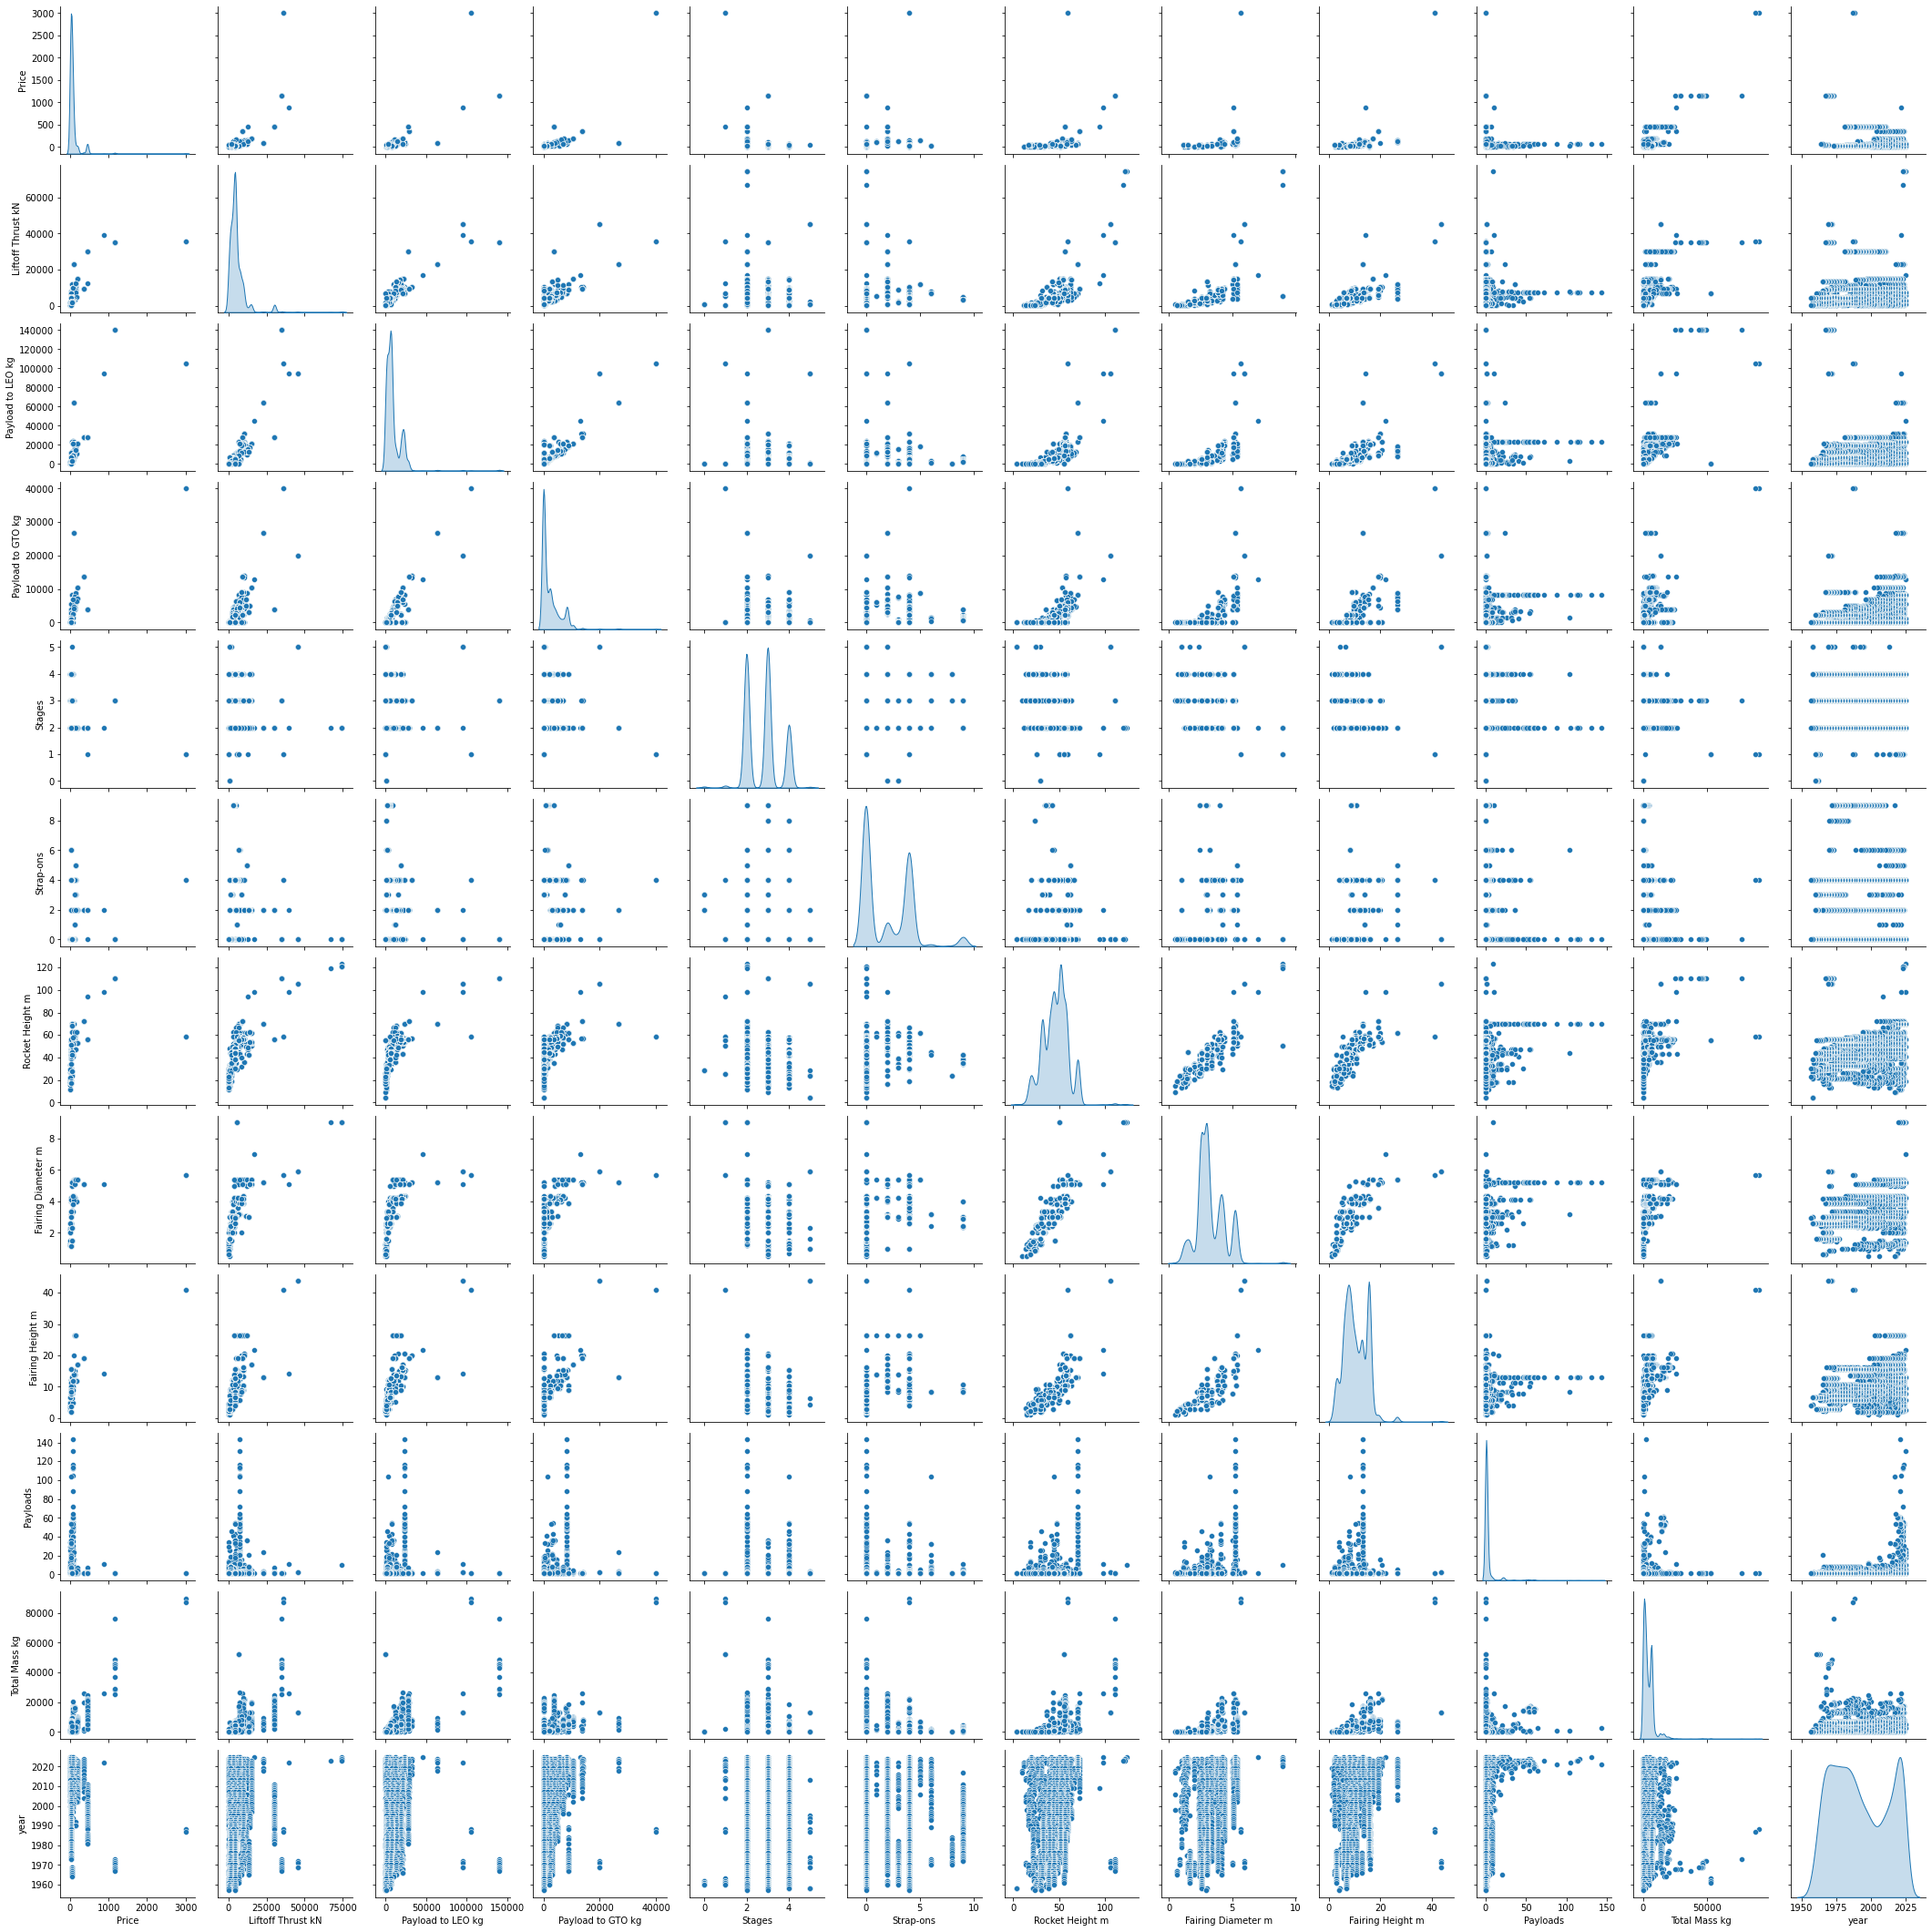

In [89]:
sns.pairplot(data=df, kind='scatter', diag_kind='kde')

### Identify the cross correlations - and identify those with strong correlations 

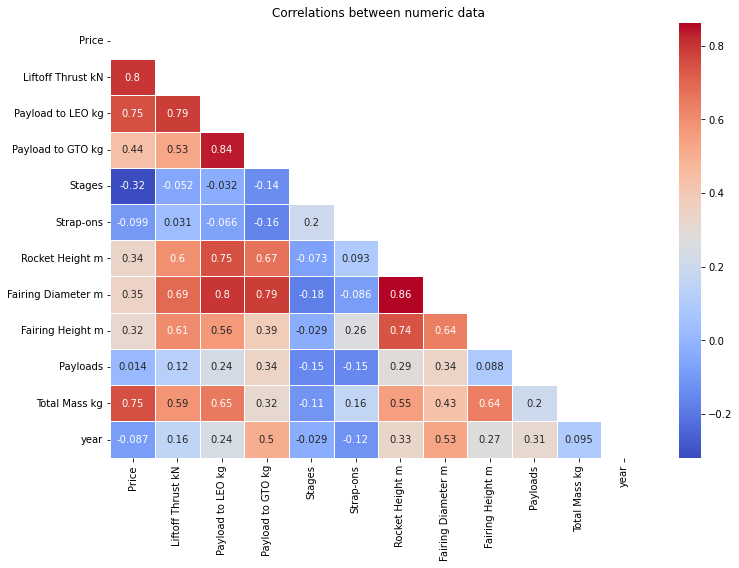

In [106]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
plt.title("Correlations between numeric data")
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=mask, linewidth=.5)
plt.show()

In [127]:
# View only the strong correlations 
corr_matrix = df.corr()

mask = corr_matrix < 0.7

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=mask, linewidth=.5)
plt.show()

In [129]:
# Collect list of strong correlations and print out values

corr_matrix = df.corr()

correlations = []
for column in corr_matrix.columns:
    
    high_corr = corr_matrix[column][(corr_matrix[column] > 0.7) & (corr_matrix[column] != 1.0)]

    if not high_corr.empty:  
        for variable, value in high_corr.items():
            
            combination = [column, variable]
            combination.sort()
            combination.append(value)
            if combination not in correlations: 
                correlations.append(combination)

correlations.sort(reverse=True, key=lambda x: x[2])
print("Correlations:\n")
for entry in correlations: 
    print(f"{entry[0]} -> {entry[1]} = {round(entry[2], 2)}")
    print()


Correlations:

Fairing Diameter m -> Rocket Height m = 0.86

Payload to GTO kg -> Payload to LEO kg = 0.84

Liftoff Thrust kN -> Price = 0.8

Fairing Diameter m -> Payload to LEO kg = 0.8

Fairing Diameter m -> Payload to GTO kg = 0.79

Liftoff Thrust kN -> Payload to LEO kg = 0.79

Payload to LEO kg -> Rocket Height m = 0.75

Payload to LEO kg -> Price = 0.75

Price -> Total Mass kg = 0.75

Fairing Height m -> Rocket Height m = 0.74



### Regression plots for highly correlated numeric data

In [130]:
# Plot the high correlation pairs
rows, cols = get_subplot_dimensions(correlations, max_cols=3)

4 3


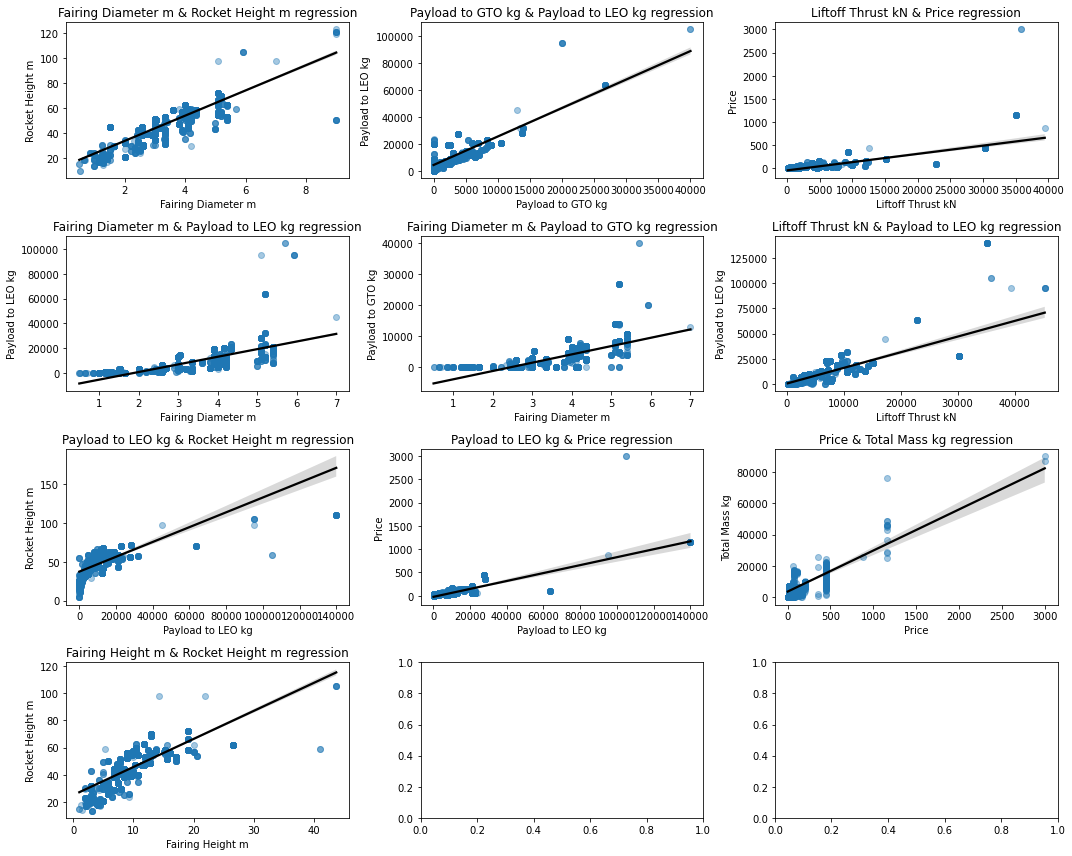

In [137]:
fig, ax = plt.subplots(rows, cols, figsize=(15, 12))

i = 0
j = 0
for column_pair in correlations:
    
    # create the plot    
    sns.regplot(data=df, x=column_pair[0], y=column_pair[1],
#                 lowess=True, 
                scatter_kws= {'alpha': 0.4}, line_kws = {'color': 'black'},
                ax=ax[i, j])
    ax[i, j].set(title=f"{column_pair[0]} & {column_pair[1]} regression")

    # increment the subplot indexes
    if j + 1 == cols:
        i += 1
        j = 0
    else: 
        j += 1

# show the plots
plt.tight_layout()
plt.show()

### Linear Regression Analysis of Rocket Features and Performance Metrics

In [150]:
def identify_linear_relationship(columns):
    
    for compare in columns: 
        
        data_df = df.dropna(subset=[compare[0], compare[1]])
        
        X_train, X_test, y_train, y_test = train_test_split(data_df[compare[0]].values.reshape(-1, 1), 
                                                            data_df[compare[1]].values, test_size=0.2, 
                                                               random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
                                                                                                     
        slope = model.coef_[0]
        intercept = model.intercept_
        
#         test_r_squared = model.score(X_test, y_test)
        test_y_pred = model.predict(X_test)
        
        test_mse = mean_squared_error(y_test, test_y_pred)
        test_rmse = test_mse ** 0.5
                                                                                                     
        # Get the slope and intercept
        slope = model.coef_[0]
        intercept = model.intercept_
        
        if " " in compare[0]:
            unit_1 = compare[0].split(" ")[-1]
        else:
            unit_1 = "million $"
        if " " in compare[1]:
            unit_2 = compare[1].split(" ")[-1]
        else:
            unit_2 = "million $"
        
        change = "increase" if slope > 0 else 'decrease'
        print(f"For every 1 {unit_1}  increase in {compare[0]}, {compare[1]} is expected to {change} by {slope:.3f} {unit_2}.")
        print(f"Test RMSE: {test_rmse:.2f}\n")



In [151]:
identify_linear_relationship(correlations)

For every 1 m  increase in Fairing Diameter m, Rocket Height m is expected to increase by 10.143 m.
Test RMSE: 6.58

For every 1 kg  increase in Payload to GTO kg, Payload to LEO kg is expected to increase by 2.092 kg.
Test RMSE: 4728.77

For every 1 kN  increase in Liftoff Thrust kN, Price is expected to increase by 0.018 million $.
Test RMSE: 54.70

For every 1 m  increase in Fairing Diameter m, Payload to LEO kg is expected to increase by 6125.425 kg.
Test RMSE: 4783.11

For every 1 m  increase in Fairing Diameter m, Payload to GTO kg is expected to increase by 2656.511 kg.
Test RMSE: 2011.72

For every 1 kN  increase in Liftoff Thrust kN, Payload to LEO kg is expected to increase by 1.577 kg.
Test RMSE: 6289.23

For every 1 kg  increase in Payload to LEO kg, Rocket Height m is expected to increase by 0.001 m.
Test RMSE: 8.76

For every 1 kg  increase in Payload to LEO kg, Price is expected to increase by 0.008 million $.
Test RMSE: 116.37

For every 1 million $  increase in Price, 

## Exploring categorical variables

In [321]:
df_plus_count = df.copy()
df_plus_count['Count'] = 1

In [326]:
# summarising the count for company rocket launches per country 
fig = px.sunburst(df_plus_count, path=['Country', 'Company'], values='Count', 
                 title="Sunburt chart showing Country and Company count")
fig.show()

In [328]:
# summarising the count for Country rocket launches and Mission Status 
fig = px.sunburst(df_plus_count, path=['Country', 'Mission Status'], values='Count', 
                 title="Sunburt chart showing Country and Mission Status count")
fig.show()

In [215]:
def cat_index_and_df(column, top=10):
    """outputs the top categories and values for the specified column and returns the list of top categories 
    and filtered df containin only the top categorical values for the passed column """
    top_category_series = df[column].value_counts().head(top)
    print(top_category_series)
    top_categories = top_category_series.index
    top_categories_df = df[df[column].isin(top_categories)]
    return top_categories_df, top_categories

In [432]:
def category_counts_plot(top_categories_df, top_categories, column, title=None, hue=None):
    """Plots the top categorical values in a count/bar plot for a given column"""
    status_palette = {
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "yellow",
        "Prelaunch Failure": "orange"
    }
    
    palette=status_palette if hue == "Mission Status" else None
    plt.figure(figsize=(12, 8))
    if title: 
        plt.title(title)
    sns.countplot(data=top_categories_df, x=column, order=top_categories, hue=hue, palette=palette)
    plt.xticks(rotation=65)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

In [440]:
def category_values_plot(top_categories_df, column, y_axis, hue=None, title=None, order=None):
    """Plots the top categorical data against numerical values """
    status_palette = {
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "yellow",
        "Prelaunch Failure": "orange"
    }
    
    palette=status_palette if hue == "Mission Status" else None
    
    plt.figure(figsize=(12, 8))
    if title: 
        plt.title(title)
    sns.barplot(data=top_categories_df, x=column, y=y_axis, hue=hue, order=order, palette=palette)
    plt.xticks(rotation=65)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

In [388]:
def top_category_time_plot(df, top_category, category, shared_y=False, main_title=None):
    """Dispalys within subplots the top n categorical values for a given column over a 
    shared time x axis, option to share the y-axis to view similar scale of the counts."""

    rows, cols = get_subplot_dimensions(top_category, output=False)
    fig, ax = plt.subplots(rows, cols, figsize=(15, 12), sharex=True, sharey=shared_y)

    i = 0
    j = 0
    for item in top_category:

        # create the plot
        sns.histplot(data=df.loc[df[category] == item], x='Launch Time', kde=True, ax=ax[i, j])
        ax[i, j].set(title=f"{item} launches")
        ax[i, j].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # increment the subplot indexes
        if j + 1 == cols:
            i += 1
            j = 0
        else: 
            j += 1

    # show the plots
    if main_title: 
        plt.suptitle(main_title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [462]:
def top_category_bar_plot(df, top_category, category, column, y_axis, hue=None, shared_y=False, main_title=None, length=1):#, y_axis, hue, shared_y=False):
    """Dispalys within subplots the top n categorical values for a given column over a 
    shared time x axis, option to share the y-axis to view similar scale of the counts."""

    rows, cols = get_subplot_dimensions(top_category, output=False)
    fig, ax = plt.subplots(rows, cols, figsize=(15, 12*length), sharex=False, sharey=shared_y)

    i = 0
    j = 0
    
    status_palette = {
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "yellow",
        "Prelaunch Failure": "orange"
    }

    
    for item in top_category: 

        sns.barplot(data=df[df[category] == item], x=column, y=y_axis, hue=hue, ax=ax[i, j], palette=status_palette)
        ax[i, j].set(title=f"{item} Mission Status")
        ax[i, j].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # increment the subplot indexes
        if j + 1 == cols:
            i += 1
            j = 0
        else: 
            j += 1

    # show the plots
    if main_title: 
        plt.suptitle(main_title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [212]:
# Get columns names for all categorical data
categ_columns = [column for column in df.dtypes.index if df.dtypes[column] == 'object']
categ_columns

['Name',
 'Mission Components',
 'Mission Status',
 'Location',
 'Company',
 'Status',
 'Orbit',
 'Country',
 'month',
 'Region']

### Top Rocket Names 

In [198]:
# top names and values 
top_rockets_df, top_rockets = cat_index_and_df("Name")

Soyuz U                778
Cosmos-3M              446
Falcon 9 Block 5       372
Voskhod                299
Molniya-M/Block ML     128
Cosmos-2 (63SM)        126
Tsyklon-3              122
Proton K/Block-DM-2    109
Tsyklon-2              106
Proton-M/Briz-M        101
Name: Name, dtype: int64


In [379]:
# plot counts of the top rocket names
category_counts_plot(top_rockets_df, top_rockets, "Name", title='Top Rocket Names')

In [390]:
# plot top rocket names launch count over time 
top_category_time_plot(df, top_rockets, "Name", shared_y=True, main_title="Plotting Rocket Names over time")

### Top companies

In [216]:
# top companies 
top_companies_df, top_companies = cat_index_and_df("Company", top=12)

RVSN USSR           2476
US Air Force         549
CASC                 501
SpaceX               457
Roscosmos            375
VKS RF               346
Arianespace          299
General Dynamics     251
NASA                 222
ULA                  163
Boeing               138
ILS                  137
Name: Company, dtype: int64


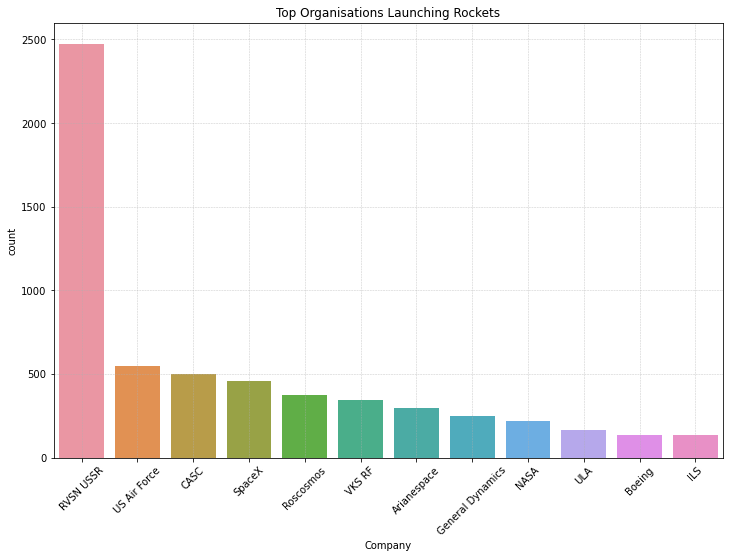

In [380]:
# plot counts of the top companies names
category_counts_plot(top_companies_df, top_companies, "Company", title="Top Organisations Launching Rockets")

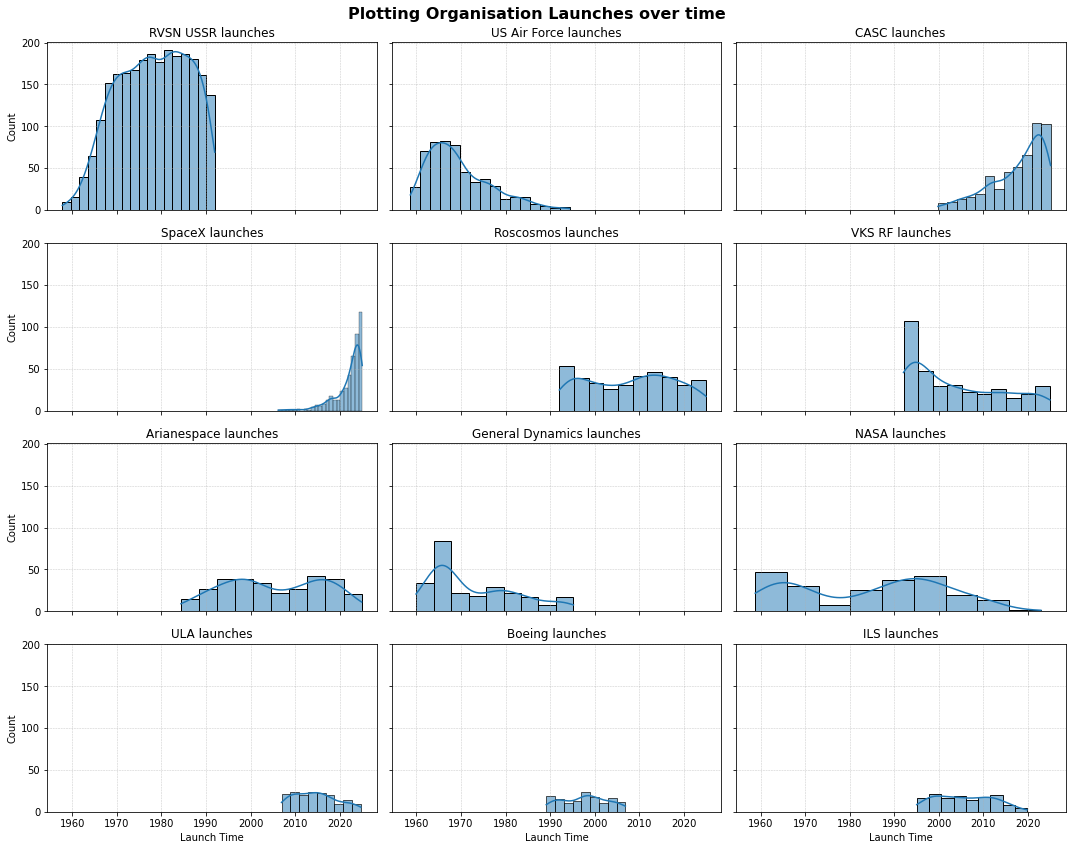

In [391]:
# plot top rocket names launch count over time 
top_category_time_plot(df, top_companies, "Company", shared_y=True, main_title="Plotting Organisation Launches over time")

### Top Countries

In [222]:
# top countries 
top_countries_df, top_countries = cat_index_and_df("Country", top=15)

USA                 2206
Russia              1821
Kazakhstan          1561
China                650
France               327
Japan                138
India                 96
New Zealand           52
Pacific Ocean         36
Iran                  23
Israel                14
North Korea            9
Kenya                  9
Marshall Islands       9
South Korea            7
Name: Country, dtype: int64


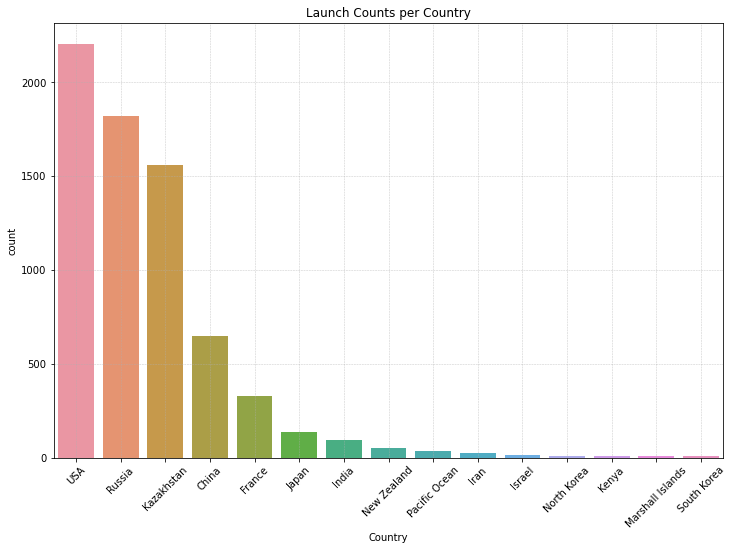

In [392]:
# plot counts of the top Countries names
category_counts_plot(top_countries_df, top_countries, "Country", title="Launch Counts per Country")

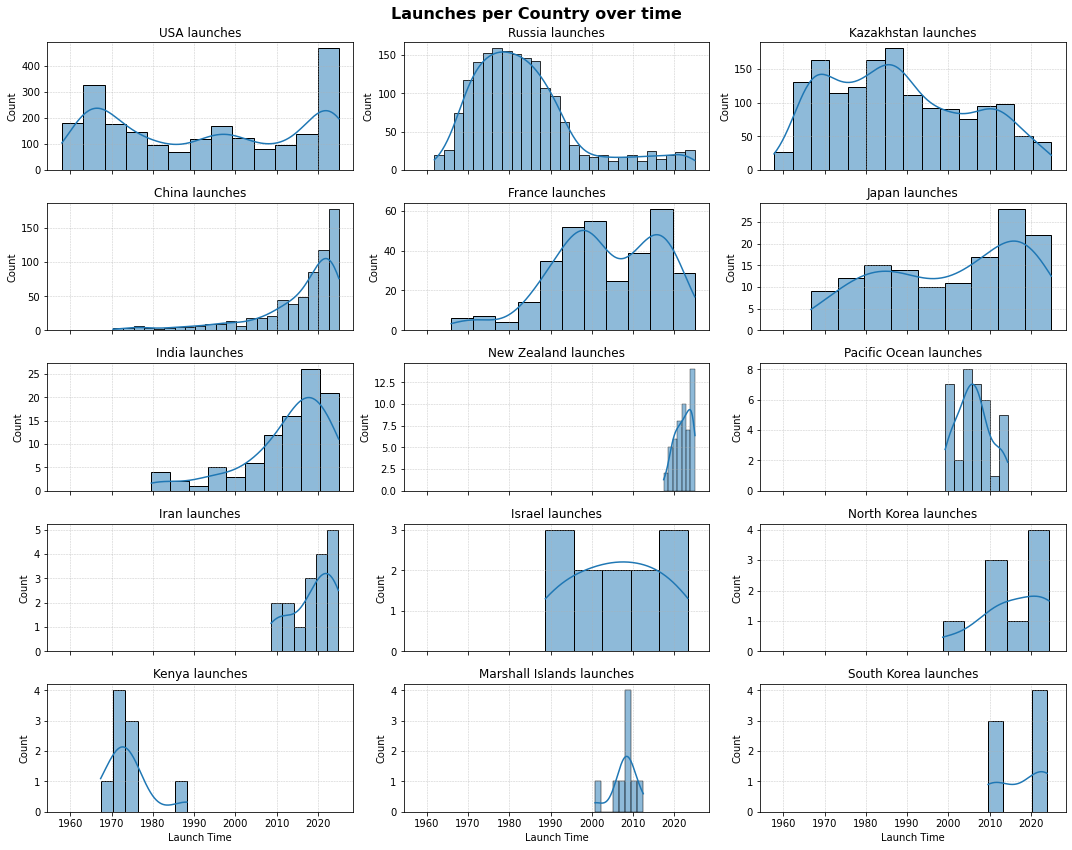

In [393]:
# plot top rocket names launch count over time 
top_category_time_plot(df, top_countries, "Country", shared_y=False, main_title="Launches per Country over time")

### What can we tell from this? 
#### 1. Russia (Including Kakakhstan) appeared very dominant in the space race/exploration at the beginning of this time period with considerable and sustained launches - up until the fall is the USSR.
#### 2. America has consistently launched frequent missions though appearing to decline over time except recently with a large and increasing spike in launches, notably by SpaceX 
#### 3. China has rapidly increased its number of launches significantly since 2015 - with current launch counts matching the USA's average launch rate (not including recent launch counts) - and is the only other country launching rockets at a comparable rate to the USA

### Which countries have been the most successful and the least succesful 

In [394]:
mission_status = df.groupby(['Country', 'Mission Status'])['Name'].count().reset_index().set_index('Country')
rocket_total = mission_status.groupby('Country')['Name'].sum()
mission_status = mission_status.join(rocket_total.rename('Rocket Total'), on='Country')
mission_status["rocket_percentage"] = mission_status.apply(lambda x: x['Name'] / x['Rocket Total'] * 100, axis=1)
mission_status

Mission Status  Name  Rocket Total  \
Country                                                                 
Australia                                 Failure     4             6   
Australia                                 Success     2             6   
Barents Sea                               Failure     1             3   
Barents Sea                               Success     2             3   
Brazil                                    Failure     2             3   
Brazil                          Prelaunch Failure     1             3   
China                                     Failure    30           650   
China                             Partial Failure    10           650   
China                                     Success   610           650   
France                                    Failure    15           327   
France                            Partial Failure     6           327   
France                                    Success   306           327   
Gran Canaria                              Success     2             2   
India                                     Failure    10            96   
India                             Partial Failure     5            96   
India                                     Success    81            96   
Iran                                      Failure     9            23   
Iran                            Prelaunch Failure     1            23   
Iran                                      Success    13            23   
Israel                                    Failure     4            14   
Israel                                    Success    10            14   
Japan                                     Failure    15           138   
Japan                             Partial Failure     2           138   
Japan                                     Success   121           138   
Kazakhstan                                Failure   113          1561   
Kazakhstan                        Partial Failure    19          1561   
Kazakhstan                      Prelaunch Failure     4          1561   
Kazakhstan                                Success  1425          1561   
Kenya                                     Success     9             9   
Marshall Islands                          Failure     3             9   
Marshall Islands                          Success     6             9   
New Zealand                               Failure     4            52   
New Zealand                               Success    48            52   
North Korea                               Failure     6             9   
North Korea                               Success     3             9   
Pacific Missile Range Facility            Failure     1             1   
Pacific Ocean                             Failure     3            36   
Pacific Ocean                     Partial Failure     1            36   
Pacific Ocean                             Success    32            36   
Russia                                    Failure    71          1821   
Russia                            Partial Failure    32          1821   
Russia                          Prelaunch Failure     1          1821   
Russia                                    Success  1717          1821   
South Korea                               Failure     3             7   
South Korea                               Success     4             7   
USA                                       Failure   168          2206   
USA                               Partial Failure    41          2206   
USA                             Prelaunch Failure     1          2206   
USA                                       Success  1996          2206   
United Kingdom                            Failure     1             1   

                                rocket_percentage  
Country                                            
Australia                               66.666667  
Australia                               33.333333  
Barents Sea                   

In [395]:
mission_status.drop(['Name', 'Rocket Total'], axis=1, inplace=True)

In [396]:
mission_status = mission_status.reset_index()

In [397]:
mission_status

Country     Mission Status  rocket_percentage
0                        Australia            Failure          66.666667
1                        Australia            Success          33.333333
2                      Barents Sea            Failure          33.333333
3                      Barents Sea            Success          66.666667
4                           Brazil            Failure          66.666667
5                           Brazil  Prelaunch Failure          33.333333
6                            China            Failure           4.615385
7                            China    Partial Failure           1.538462
8                            China            Success          93.846154
9                           France            Failure           4.587156
10                          France    Partial Failure           1.834862
11                          France            Success          93.577982
12                    Gran Canaria            Success         100.000000
13                           India            Failure          10.416667
14                           India    Partial Failure           5.208333
15                           India            Success          84.375000
16                            Iran            Failure          39.130435
17                            Iran  Prelaunch Failure           4.347826
18                            Iran            Success          56.521739
19                          Israel            Failure          28.571429
20                          Israel            Success          71.428571
21                           Japan            Failure          10.869565
22                           Japan    Partial Failure           1.449275
23                           Japan            Success          87.681159
24                      Kazakhstan            Failure           7.238949
25                      Kazakhstan    Partial Failure           1.217168
26                      Kazakhstan  Prelaunch Failure           0.256246
27                      Kazakhstan            Success          91.287636
28                           Kenya            Success         100.000000
29                Marshall Islands            Failure          33.333333
30                Marshall Islands            Success          66.666667
31                     New Zealand            Failure           7.692308
32                     New Zealand            Success          92.307692
33                     North Korea            Failure          66.666667
34                     North Korea            Success          33.333333
35  Pacific Missile Range Facility            Failure         100.000000
36                   Pacific Ocean            Failure           8.333333
37                   Pacific Ocean    Partial Failure           2.777778
38                   Pacific Ocean            Success          88.888889
39                          Russia            Failure           3.898957
40                          Russia    Partial Failure           1.757276
41                          Russia  Prelaunch Failure           0.054915
42                          Russia            Success          94.288852
43                     South Korea            Failure          42.857143
44                     South Korea            Success          57.142857
45                             USA            Failure           7.615594
46                             USA    Partial Failure           1.858568
47                             USA  Prelaunch Failure           0.045331
48                             USA            Success          90.480508
49                  United Kingdom            Failure         100.000000

In [398]:
# plot counts of Launch Mission Status by Countries names
category_counts_plot(top_countries_df, top_countries, "Country", hue='Mission Status', title="Rocket Mission Status by Country")


In [399]:
# plot counts of the top Countries by pe
category_values_plot(mission_status, 'Country', 'rocket_percentage', hue='Mission Status', title="Mission Status Percentage Per Country", order=top_countries)

In [463]:
# top_category_bar_plot(df, top_countries, "column", y_axis, hue, shared_y=False):
top_category_bar_plot(mission_status, top_countries, 'Country', 'Mission Status', 'rocket_percentage', main_title="Launch Mission Status per Country")

In [401]:
# so which countries have been the most successful? 
success_df = mission_status.loc[mission_status['Mission Status'] == "Success"].drop('Mission Status', axis=1)

In [402]:
success_df = success_df.sort_values('rocket_percentage', ascending=False).set_index('Country')

In [403]:
success_df

rocket_percentage
Country                            
Kenya                    100.000000
Gran Canaria             100.000000
Russia                    94.288852
China                     93.846154
France                    93.577982
New Zealand               92.307692
Kazakhstan                91.287636
USA                       90.480508
Pacific Ocean             88.888889
Japan                     87.681159
India                     84.375000
Israel                    71.428571
Barents Sea               66.666667
Marshall Islands          66.666667
South Korea               57.142857
Iran                      56.521739
North Korea               33.333333
Australia                 33.333333

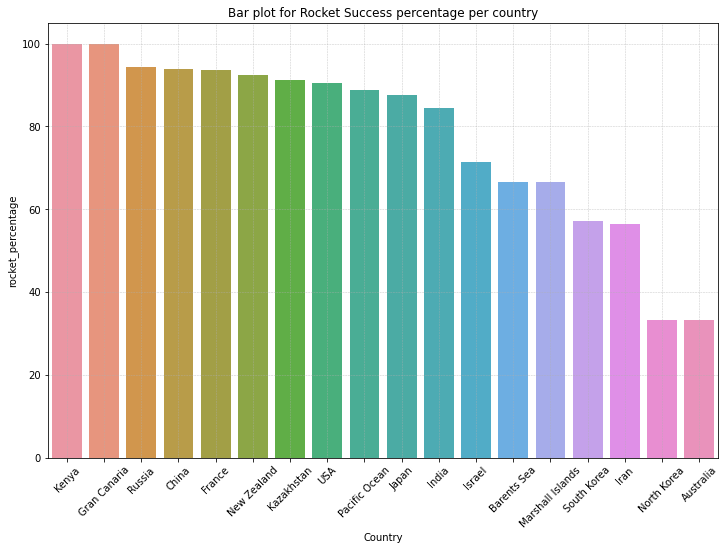

In [404]:
category_values_plot(success_df, success_df.index, "rocket_percentage", title="Bar plot for Rocket Success percentage per country")

In [405]:
# plotting failure - as combination of all types of failures (not a success)
success_df['Failure'] = 100 - success_df["rocket_percentage"]

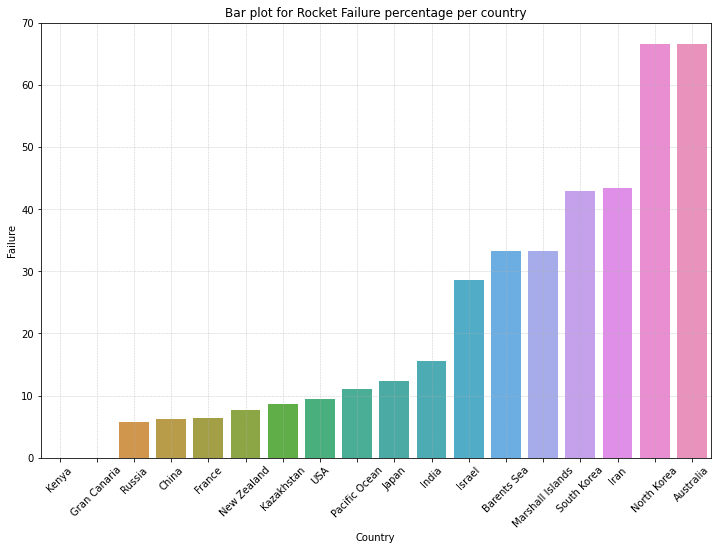

In [406]:
category_values_plot(success_df, success_df.index, 'Failure', title="Bar plot for Rocket Failure percentage per country")

### Which Company has bee the most successful? 


In [407]:
company_status = df.groupby(['Company', 'Mission Status'])['Name'].count().reset_index().set_index('Company')
rocket_total = company_status.groupby('Company')['Name'].sum()
company_status = company_status.join(rocket_total.rename('Rocket Total'), on='Company')
company_status["rocket_percentage"] = company_status.apply(lambda x: x['Name'] / x['Rocket Total'] * 100, axis=1)
company_status

Mission Status  Name  Rocket Total  rocket_percentage
Company                                                                
ABL SS                   Failure     1             1         100.000000
ABMA                     Failure     8            17          47.058824
ABMA             Partial Failure     1            17           5.882353
ABMA                     Success     8            17          47.058824
ADD                      Success     1             1         100.000000
...                          ...   ...           ...                ...
Virgin Galactic          Success    19            21          90.476190
Virgin Orbit             Failure     2             6          33.333333
Virgin Orbit             Success     4             6          66.666667
iSpace                   Failure     4             7          57.142857
iSpace                   Success     3             7          42.857143

[150 rows x 4 columns]

In [408]:
company_status.drop(['Name', 'Rocket Total'], axis=1, inplace=True)
company_status = company_status.reset_index()

In [409]:
company_status

Company   Mission Status  rocket_percentage
0             ABL SS          Failure         100.000000
1               ABMA          Failure          47.058824
2               ABMA  Partial Failure           5.882353
3               ABMA          Success          47.058824
4                ADD          Success         100.000000
..               ...              ...                ...
145  Virgin Galactic          Success          90.476190
146     Virgin Orbit          Failure          33.333333
147     Virgin Orbit          Success          66.666667
148           iSpace          Failure          57.142857
149           iSpace          Success          42.857143

[150 rows x 3 columns]

In [465]:
top_category_bar_plot(company_status, company_status['Company'].unique(), 'Company', 'Mission Status', 'rocket_percentage', length=5, main_title="Launch Mission Status per company")

In [420]:
company_success_df = company_status.loc[company_status['Mission Status'] == "Success"].drop('Mission Status', axis=1)
company_success_df = company_success_df.sort_values('rocket_percentage', ascending=False).set_index('Company')
company_success_df

rocket_percentage
Company                            
Space Pioneer            100.000000
GK LS                    100.000000
Douglas                  100.000000
Chinarocket              100.000000
ADD                      100.000000
Land Launch              100.000000
Starsem                  100.000000
OKB-586                  100.000000
Orienspace               100.000000
Scaled                   100.000000
ASI                      100.000000
ULA                       99.386503
CASC                      97.804391
SpaceX                    96.936543
Blue Origin               96.551724
Boeing                    96.376812
Arianespace               95.986622
Kosmotras                 95.454545
Roscosmos                 95.200000
ILS                       94.890511
MHI                       94.623656
VKS RF                    94.508671
Galactic Energy           94.117647
Lockheed                  93.670886
NASA                      93.243243
Rocket Lab                93.103448
Eurockot                  92.307692
RVSN USSR                 92.245557
ExPace                    90.909091
Virgin Galactic           90.476190
Northrop                  90.109890
Sea Launch                88.888889
US Air Force              88.524590
Martin Marietta           87.719298
ISAS                      86.666667
ISRO                      84.375000
CAS Space                 83.333333
IRGC                      83.333333
CAC                       81.481481
General Dynamics          80.876494
MASI                      78.048780
Armée de l'Air            75.000000
JAXA                      75.000000
CNES                      75.000000
IAI                       71.428571
MITT                      71.428571
SRC                       66.666667
Virgin Orbit              66.666667
ESA                       66.666667
Landspace                 60.000000
RAE                       50.000000
KARI                      50.000000
ABMA                      47.058824
ISA                       47.058824
iSpace                    42.857143
NADA                      40.000000
Firefly                   40.000000
Astra                     28.571429
KCST                      25.000000
CASIC                     25.000000
UT                        20.000000
US Navy                   11.764706

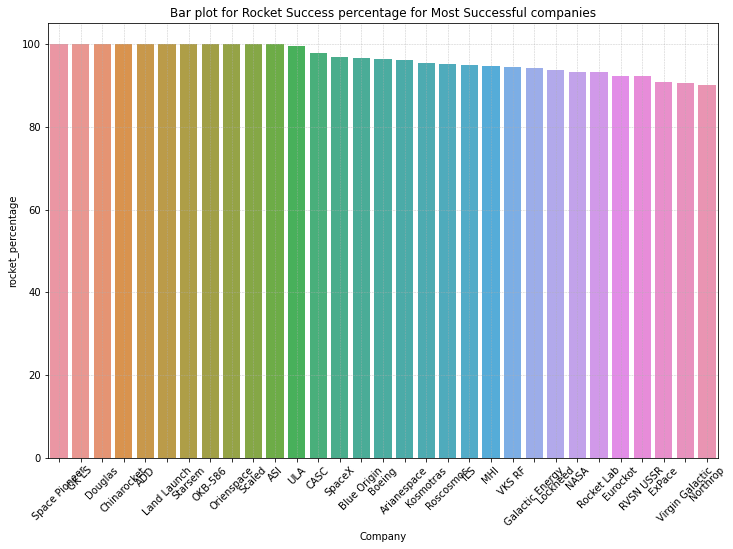

In [425]:
# show the most successful companies/organisations
values_to_show = (len(company_success_df)//2)
category_values_plot(company_success_df.iloc[:values_to_show], company_success_df.index[:values_to_show], "rocket_percentage", title="Bar plot for Rocket Success percentage for Most Successful companies")

In [426]:
# plotting failure - as combination of all types of failures (not a success)
company_success_df['Failure'] = 100 - company_success_df["rocket_percentage"]


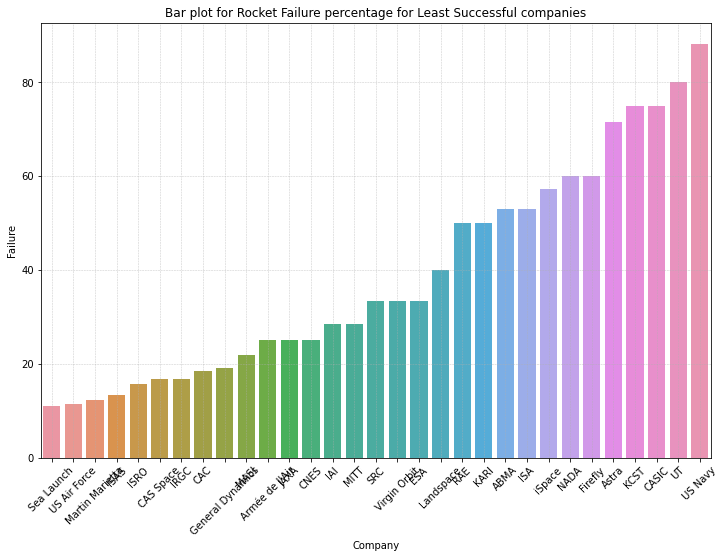

In [428]:
values_to_show = (len(company_success_df)//2)
category_values_plot(company_success_df.iloc[values_to_show:], company_success_df.index[values_to_show:], "Failure", title="Bar plot for Rocket Failure percentage for Least Successful companies")

### Does the type of Orbit affect the success of the launch 

In [429]:
df['Orbit'].unique()

array(['Low Earth Orbit', 'Geostationary Transfer Orbit', 'Polar Orbit',
       'Sun-Synchronous Orbit', 'Suborbital', 'Medium Earth Orbit',
       'Trans Lunar Injection', nan, 'Elliptical', 'Heliocentric Orbit',
       'Molniya Orbit', 'Geostationary Earth Orbit', 'Selenocentric',
       'Retrograde Low Earth Orbit', 'Sun–Earth L1', 'Sun–Earth L2',
       'Geosynchronous Orbit', 'Highly Elliptical Orbit',
       'Near Polar Earth Orbit', 'Tundra Orbit', 'Earth-Moon L2',
       'High Earth Orbit', 'Lunar orbit', 'Polar retrograde'],
      dtype=object)

In [430]:
len(df['Orbit'].unique())

24

Low Earth Orbit                 3639
Geostationary Transfer Orbit     834
Sun-Synchronous Orbit            575
Geostationary Earth Orbit        256
Medium Earth Orbit               230
Molniya Orbit                    230
Polar Orbit                      182
Heliocentric Orbit               112
Suborbital                       104
Trans Lunar Injection             95
High Earth Orbit                  92
Highly Elliptical Orbit           49
Geosynchronous Orbit              40
Elliptical                        26
Lunar orbit                       23
Retrograde Low Earth Orbit        17
Sun–Earth L2                       4
Earth-Moon L2                      2
Selenocentric                      2
Tundra Orbit                       2
Near Polar Earth Orbit             2
Sun–Earth L1                       2
Polar retrograde                   1
Name: Orbit, dtype: int64


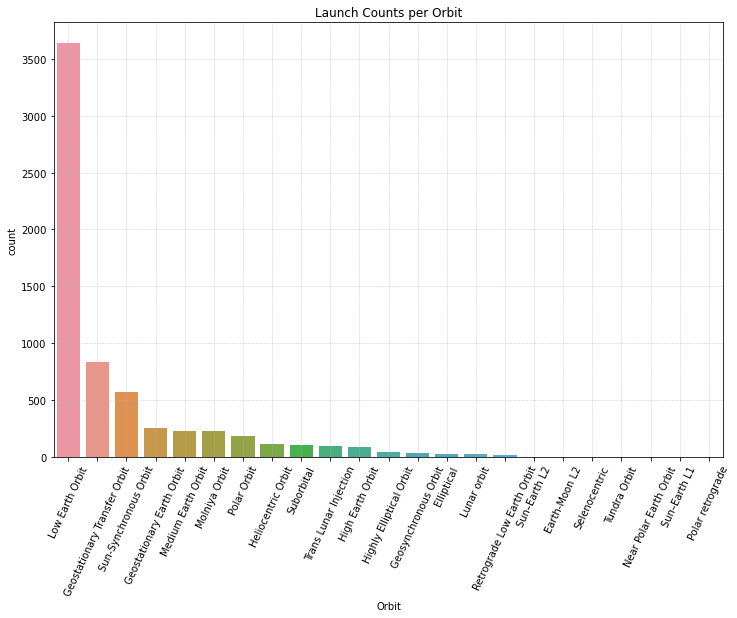

In [433]:
## plot the proportion of orbits 
top_orbits_df, top_orbits = cat_index_and_df("Orbit", top=24)
# plot counts of the top Countries names
category_counts_plot(top_orbits_df, top_orbits, "Orbit", title="Launch Counts per Orbit")

In [434]:
# groupby orbit - and then by success
orbit_status = df.groupby(['Orbit', 'Mission Status'])['Name'].count().reset_index().set_index('Orbit')
rocket_total = orbit_status.groupby('Orbit')['Name'].sum()
orbit_status = orbit_status.join(rocket_total.rename('Rocket Total'), on='Orbit')
orbit_status["rocket_percentage"] = orbit_status.apply(lambda x: x['Name'] / x['Rocket Total'] * 100, axis=1)
orbit_status.drop(['Name', 'Rocket Total'], axis=1, inplace=True)
orbit_status = orbit_status.reset_index()
orbit_status

Orbit     Mission Status  rocket_percentage
0                  Earth-Moon L2            Success         100.000000
1                     Elliptical            Failure           7.692308
2                     Elliptical            Success          92.307692
3      Geostationary Earth Orbit            Failure           7.031250
4      Geostationary Earth Orbit    Partial Failure           1.953125
5      Geostationary Earth Orbit            Success          91.015625
6   Geostationary Transfer Orbit            Failure           4.676259
7   Geostationary Transfer Orbit    Partial Failure           2.877698
8   Geostationary Transfer Orbit  Prelaunch Failure           0.119904
9   Geostationary Transfer Orbit            Success          92.326139
10          Geosynchronous Orbit            Failure           7.500000
11          Geosynchronous Orbit            Success          92.500000
12            Heliocentric Orbit            Failure          10.714286
13            Heliocentric Orbit    Partial Failure           1.785714
14            Heliocentric Orbit            Success          87.500000
15              High Earth Orbit    Partial Failure           3.260870
16              High Earth Orbit            Success          96.739130
17       Highly Elliptical Orbit            Failure           4.081633
18       Highly Elliptical Orbit    Partial Failure           4.081633
19       Highly Elliptical Orbit            Success          91.836735
20               Low Earth Orbit            Failure           5.770816
21               Low Earth Orbit    Partial Failure           1.126683
22               Low Earth Orbit  Prelaunch Failure           0.164880
23               Low Earth Orbit            Success          92.937620
24                   Lunar orbit            Failure          21.739130
25                   Lunar orbit    Partial Failure           8.695652
26                   Lunar orbit            Success          69.565217
27            Medium Earth Orbit            Failure          10.000000
28            Medium Earth Orbit    Partial Failure           0.869565
29            Medium Earth Orbit            Success          89.130435
30                 Molniya Orbit            Failure           2.173913
31                 Molniya Orbit    Partial Failure           2.608696
32                 Molniya Orbit            Success          95.217391
33        Near Polar Earth Orbit            Failure          50.000000
34        Near Polar Earth Orbit            Success          50.000000
35                   Polar Orbit            Failure           3.296703
36                   Polar Orbit    Partial Failure           2.197802
37                   Polar Orbit            Success          94.505495
38              Polar retrograde            Success         100.000000
39    Retrograde Low Earth Orbit            Failure          23.529412
40    Retrograde Low Earth Orbit    Partial Failure          11.764706
41    Retrograde Low Earth Orbit            Success          64.705882
42                 Selenocentric            Success         100.000000
43                    Suborbital            Failure           6.730769
44                    Suborbital    Partial Failure           5.769231
45                    Suborbital  Prelaunch Failure           0.961538
46                    Suborbital            Success          86.538462
47         Sun-Synchronous Orbit            Failure           5.739130
48         Sun-Synchronous Orbit    Partial Failure           0.347826
49         Sun-Synchronous Orbit            Success          93.913043
50                  Sun–Earth L1            Success         100.000000
51                  Sun–Earth L2            Success         100.000000
52         Trans Lunar Injection            Failure          25.263158
53         Trans Lunar Injection    Partial Failure           5.263158
54         Trans Lunar Injection            Success          69.473684
55                  Tundra Orbit            Success

In [466]:
top_category_bar_plot(orbit_status, orbit_status['Orbit'].unique(), 'Orbit', 'Mission Status', 'rocket_percentage', length=3, main_title="Launch Mission Status per Launch Orbit")

In [438]:
orbit_success_df = orbit_status.loc[orbit_status['Mission Status'] == "Success"].drop('Mission Status', axis=1)
orbit_success_df = orbit_success_df.sort_values('rocket_percentage', ascending=False).set_index('Orbit')
orbit_success_df['Failure'] = 100 - orbit_success_df["rocket_percentage"]
orbit_success_df

rocket_percentage    Failure
Orbit                                                     
Earth-Moon L2                        100.000000   0.000000
Polar retrograde                     100.000000   0.000000
Sun–Earth L2                         100.000000   0.000000
Sun–Earth L1                         100.000000   0.000000
Selenocentric                        100.000000   0.000000
Tundra Orbit                         100.000000   0.000000
High Earth Orbit                      96.739130   3.260870
Molniya Orbit                         95.217391   4.782609
Polar Orbit                           94.505495   5.494505
Sun-Synchronous Orbit                 93.913043   6.086957
Low Earth Orbit                       92.937620   7.062380
Geosynchronous Orbit                  92.500000   7.500000
Geostationary Transfer Orbit          92.326139   7.673861
Elliptical                            92.307692   7.692308
Highly Elliptical Orbit               91.836735   8.163265
Geostationary Earth Orbit             91.015625   8.984375
Medium Earth Orbit                    89.130435  10.869565
Heliocentric Orbit                    87.500000  12.500000
Suborbital                            86.538462  13.461538
Lunar orbit                           69.565217  30.434783
Trans Lunar Injection                 69.473684  30.526316
Retrograde Low Earth Orbit            64.705882  35.294118
Near Polar Earth Orbit                50.000000  50.000000

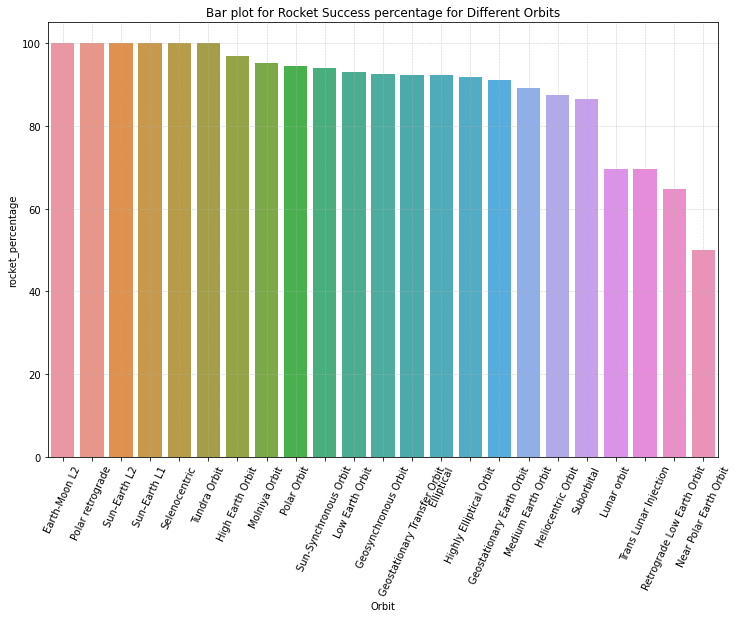

In [441]:
# show the most successful orbits
category_values_plot(orbit_success_df, orbit_success_df.index, "rocket_percentage", title="Bar plot for Rocket Success percentage for Different Orbits")

## Investigating Categorical data against numeric data

## Price

### Which country launches rockets the cheapest?

In [443]:
# groupby country - get the price - and the mean 
country_price = df.groupby('Country')['Price'].agg(['mean', 'std', 'median'])
country_price

mean         std  median
Country                                                       
Australia                              NaN         NaN     NaN
Barents Sea                            NaN         NaN     NaN
Brazil                                 NaN         NaN     NaN
China                            35.952479   20.236966   29.75
France                          139.284672   80.102503  200.00
Gran Canaria                     40.000000    0.000000   40.00
India                            33.481481   12.627461   31.00
Iran                                   NaN         NaN     NaN
Israel                                 NaN         NaN     NaN
Japan                            83.896226   25.002953   90.00
Kazakhstan                       40.485056  169.266620   20.00
Kenya                                  NaN         NaN     NaN
Marshall Islands                 21.666667   17.392527    7.00
New Zealand                       7.500000    0.000000    7.50
North Korea                            NaN         NaN     NaN
Pacific Missile Range Facility   15.000000         NaN   15.00
Pacific Ocean                          NaN         NaN     NaN
Russia                           20.773453    7.191423   20.00
South Korea                            NaN         NaN     NaN
USA                             154.457557  189.444936   69.75
United Kingdom                   12.000000         NaN   12.00

In [444]:
country_price.dropna(axis=0, inplace=True) 
country_price

mean         std  median
Country                                         
China              35.952479   20.236966   29.75
France            139.284672   80.102503  200.00
Gran Canaria       40.000000    0.000000   40.00
India              33.481481   12.627461   31.00
Japan              83.896226   25.002953   90.00
Kazakhstan         40.485056  169.266620   20.00
Marshall Islands   21.666667   17.392527    7.00
New Zealand         7.500000    0.000000    7.50
Russia             20.773453    7.191423   20.00
USA               154.457557  189.444936   69.75

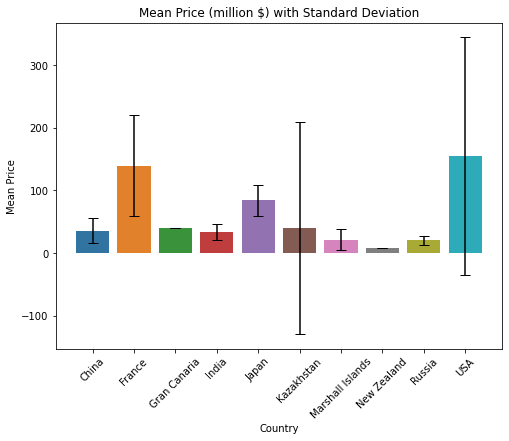

In [447]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=country_price.index, y=country_price["mean"], capsize=0.2)

for i, country in enumerate(country_price.index):
    plt.errorbar(i, country_price.loc[country, "mean"], yerr=country_price.loc[country, "std"], fmt='none', capsize=5, color='black')

plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Mean Price")
plt.title("Mean Price (million $) with Standard Deviation")
plt.show()

### Does the amount of money spent increase the success rate of launch?

In [448]:
# need to groupby the Mission Status and get the average price 
status_price = df.groupby('Mission Status')['Price'].agg(['mean', 'std', 'median'])
status_price

mean         std  median
Mission Status                                  
Failure            42.739231   68.365312    20.0
Partial Failure    99.746429  218.739314    43.5
Prelaunch Failure  41.000000   29.698485    41.0
Success            76.148281  145.364304    30.8

In [449]:
# if i was to count every mission status that was not 'success' as failure then is there a difference

df_success_failure = df.copy()
df_success_failure['Mission Status Updated'] = df_success_failure['Mission Status'].apply(lambda x: 'Success' if x=='Success' else 'Failure')

In [451]:
status_price = df_success_failure.groupby('Mission Status Updated')['Price'].agg(['mean', 'std', 'median'])
status_price
# so it appears that the launches that cost more money lead to higher success rates 

mean         std  median
Mission Status Updated                               
Failure                 55.902231  121.909372    29.0
Success                 76.148281  145.364304    30.8

In [452]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=status_price.index, y=status_price["mean"], capsize=0.2)

plt.xlabel("Mission Status")
plt.xticks(rotation=45)
plt.ylabel("Mean Price (million %)")
plt.title("Mean Price (million $) for successful and failed launches")
plt.show()

### has the amount of money spent on launch increased over time? 

In [454]:
# need to groupby the year and get the average price

year_price = df.groupby('year')['Price'].mean()
year_price

year
1957            NaN
1958            NaN
1959            NaN
1960            NaN
1961            NaN
1962            NaN
1963            NaN
1964      63.230000
1965      63.230000
1966      59.000000
1967     196.625000
1968     279.200000
1969     609.500000
1970    1160.000000
1971    1160.000000
1972    1160.000000
1973     305.000000
1974      20.000000
1975      20.000000
1976      20.000000
1977      20.000000
1978      20.000000
1979      20.000000
1980      20.000000
1981      39.545455
1982      46.955102
1983      56.475000
1984      64.816000
1985      98.416000
1986      43.770000
1987      88.119149
1988     100.916000
1989      71.477273
1990      93.037209
1991     109.032258
1992     123.670833
1993     130.372414
1994     125.940323
1995     160.454545
1996     155.858696
1997     158.834615
1998     126.136364
1999      82.254400
2000     103.259333
2001     172.888889
2002     141.841739
2003      69.644783
2004      74.985200
2005      70.372000
2006     104.11

In [461]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(x=year_price.index, y=year_price.values)
plt.title("Average Price (million %) over years")
plt.xticks(rotation=90)
plt.ylabel('Price (million %)')
plt.show()

### Has the success rate of launches increased over time? 

In [469]:
# groupby year - and then by success
year_status = df.groupby(['year', 'Mission Status'])['Name'].count().reset_index().set_index('year')
rocket_total = year_status.groupby('year')['Name'].sum()
year_status = year_status.join(rocket_total.rename('Rocket Total'), on='year')
year_status["rocket_percentage"] = year_status.apply(lambda x: x['Name'] / x['Rocket Total'] * 100, axis=1)
year_status.drop(['Name', 'Rocket Total'], axis=1, inplace=True)
year_status = year_status.reset_index()
year_status

year   Mission Status  rocket_percentage
0    1957          Failure          33.333333
1    1957          Success          66.666667
2    1958          Failure          71.428571
3    1958  Partial Failure           7.142857
4    1958          Success          21.428571
..    ...              ...                ...
193  2024          Failure           2.214022
194  2024  Partial Failure           0.738007
195  2024          Success          97.047970
196  2025          Failure           5.263158
197  2025          Success          94.736842

[198 rows x 3 columns]

In [472]:
year_status_df = year_status.loc[year_status['Mission Status'] == "Success"].drop('Mission Status', axis=1)
# year_status_df = year_status_df.sort_values('rocket_percentage', ascending=False).set_index('year')
year_status_df['Failure'] = 100 - year_status_df["rocket_percentage"]
year_status_df

year  rocket_percentage    Failure
1    1957          66.666667  33.333333
4    1958          21.428571  78.571429
7    1959          41.666667  58.333333
9    1960          48.780488  51.219512
12   1961          60.714286  39.285714
15   1962          79.761905  20.238095
18   1963          77.464789  22.535211
21   1964          82.000000  18.000000
24   1965          87.301587  12.698413
28   1966          84.558824  15.441176
31   1967          86.428571  13.571429
34   1968          90.076336   9.923664
37   1969          84.251969  15.748031
40   1970          88.888889  11.111111
43   1971          87.313433  12.686567
46   1972          91.304348   8.695652
49   1973          93.220339   6.779661
52   1974          92.105263   7.894737
54   1975          94.696970   5.303030
57   1976          95.419847   4.580153
60   1977          93.893130   6.106870
63   1978          94.573643   5.426357
65   1979          95.454545   4.545455
68   1980          93.577982   6.422018
71   1981          94.444444   5.555556
74   1982          93.023256   6.976744
77   1983          98.461538   1.538462
80   1984          97.709924   2.290076
83   1985          95.238095   4.761905
86   1986          90.090090   9.909910
89   1987          94.827586   5.172414
92   1988          94.262295   5.737705
95   1989          98.039216   1.960784
98   1990          93.442623   6.557377
101  1991          93.548387   6.451613
104  1992          95.876289   4.123711
107  1993          91.666667   8.333333
110  1994          93.548387   6.451613
113  1995          88.750000  11.250000
116  1996          89.610390  10.389610
119  1997          92.134831   7.865169
122  1998          91.463415   8.536585
124  1999          89.743590  10.256410
126  2000          95.294118   4.705882
129  2001          94.915254   5.084746
131  2002          93.846154   6.153846
134  2003          93.750000   6.250000
137  2004          93.103448   6.896552
139  2005          92.857143   7.142857
141  2006          93.939394   6.060606
144  2007          92.647059   7.352941
147  2008          95.652174   4.347826
150  2009          93.670886   6.329114
152  2010          94.594595   5.405405
155  2011          92.857143   7.142857
158  2012          92.307692   7.692308
161  2013          95.180723   4.819277
164  2014          94.791667   5.208333
167  2015          94.382022   5.617978
171  2016          95.555556   4.444444
174  2017          92.391304   7.608696
177  2018          97.500000   2.500000
180  2019          94.392523   5.607477
183  2020          89.830508  10.169492
186  2021          91.082803   8.917197
189  2022          95.287958   4.712042
192  2023          94.827586   5.172414
195  2024          97.047970   2.952030
197  2025          94.736842   5.263158

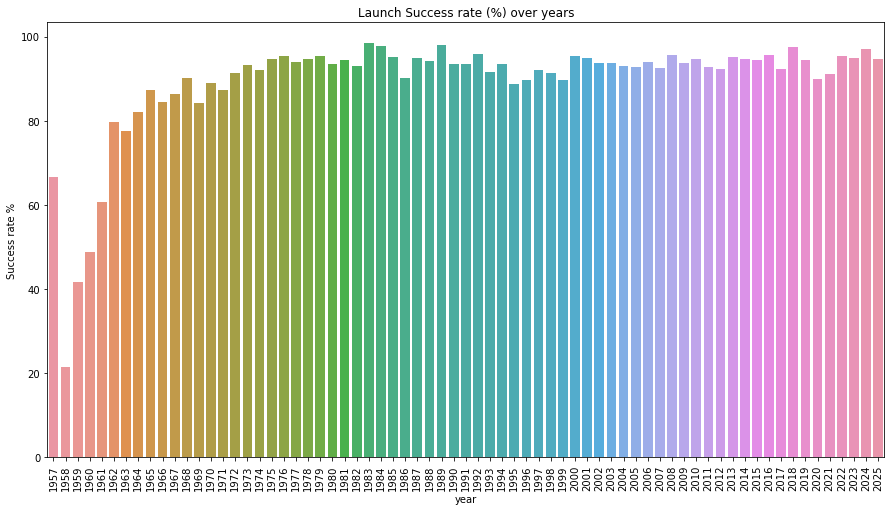

In [474]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(x=year_status_df.year, y=year_status_df.rocket_percentage)
plt.title("Launch Success rate (%) over years")
plt.xticks(rotation=90)
plt.ylabel('Success rate %')
plt.show()

### Has the success rate by country changed over the years?

In [480]:
# groupby year - and then by success
year_status = df.groupby(['Country', 'year', 'Mission Status'])['Name'].count().reset_index().set_index(['Country','year'])
rocket_total = year_status.groupby(['Country','year'])['Name'].sum()
year_status = year_status.join(rocket_total.rename('Rocket Total'), on=['Country','year'])
year_status["rocket_percentage"] = year_status.apply(lambda x: x['Name'] / x['Rocket Total'] * 100, axis=1)
year_status.drop(['Name', 'Rocket Total'], axis=1, inplace=True)
year_status = year_status.reset_index()
year_status

Country  year Mission Status  rocket_percentage
0         Australia  1967        Success         100.000000
1         Australia  1968        Failure         100.000000
2         Australia  1969        Failure         100.000000
3         Australia  1970        Failure         100.000000
4         Australia  1971        Success         100.000000
..              ...   ...            ...                ...
751             USA  2024        Failure           0.653595
752             USA  2024        Success          99.346405
753             USA  2025        Failure           7.692308
754             USA  2025        Success          92.307692
755  United Kingdom  2023        Failure         100.000000

[756 rows x 4 columns]

In [481]:
year_status_df = year_status.loc[year_status['Mission Status'] == "Success"].drop('Mission Status', axis=1)
# year_status_df = year_status_df.sort_values('rocket_percentage', ascending=False).set_index('year')
year_status_df['Failure'] = 100 - year_status_df["rocket_percentage"]
year_status_df

Country  year  rocket_percentage   Failure
0      Australia  1967         100.000000  0.000000
4      Australia  1971         100.000000  0.000000
5    Barents Sea  1998         100.000000  0.000000
7    Barents Sea  2006         100.000000  0.000000
11         China  1970         100.000000  0.000000
..           ...   ...                ...       ...
744          USA  2021          91.228070  8.771930
747          USA  2022          95.121951  4.878049
750          USA  2023          95.726496  4.273504
752          USA  2024          99.346405  0.653595
754          USA  2025          92.307692  7.692308

[438 rows x 4 columns]

In [511]:
countries = df['Country'].unique()

rows, cols = get_subplot_dimensions(countries, output=False, max_cols=1)
fig, ax = plt.subplots(rows, cols, figsize=(15, 40), sharex=True, sharey=True)
year_status_df['year'] = pd.to_numeric(year_status_df['year'], errors='coerce')
min_year = year_status_df['year'].min()
max_year = year_status_df['year'].max()

i = 0
j = 0
for country in countries: 
    
    data_df = year_status_df.loc[year_status_df['Country'] == country]

    # Skip if there is no data for this country
    if data_df.empty:
        continue
    
    # add an empty row for any missing years
    for time in range(min_year, max_year, 1):
        if time not in data_df['year'].values:
            country = data_df.iloc[0, 0]
            new_row_df = pd.DataFrame({
                'Country': [country], 
                'year': [time], 
                'rocket_percentage': [0],
                'Failure': [0]})
            
            
            data_df = pd.concat([data_df, new_row_df], ignore_index=True)
            
    data_df.sort_values('year')
        
    
    sns.barplot(data=data_df, x='year', y='rocket_percentage', ax=ax[i])
    ax[i].set(title=f"{country} launches")
    ax[i].set_ylabel('Success %')  # Modify the label text
    ax[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    
    # increment the subplot indexes
    i += 1

plt.xticks(rotation=90)
plt.yticks(rotation=20)

plt.show()